In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as stats
import pandas as pd
import rethinking as rt

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


__Probabilistic Programming. Wasowski. Pardo. IT University of Copenhagen__

This file contains the list of exercises for the week, as well as any related code.

## Exercises

The exercises for this week are: __all exercises__ from Chapter 4, McElreath, with exceptions and remarks noted below. 


* __Exercise 4M2__ asks for using `quap`. We do not use `quap` in this course. We use MCMC instead (`pymc.sampling.sample` does that). There is really no benefit to quadratic approximation which is only locally correct, and only gives us key summary statistics. If we can manage to achieve a full posterior sample, we have more information at hand.  If you have a good sample trace from 4M1, you can just call `arviz.summary` on it to get the mean and standard deviation from our parameters (which `quap` would give us). cf. https://arviz-devs.github.io/arviz/api/generated/arviz.summary.html
* __Exercise 4M7__ uses model m4.3. The model uses data, so first the data loading code:

In [3]:
data = pd.read_csv('Howell1.csv', sep=';').to_xarray()
adults = data.where(data.age >= 18, drop = True)# condition on adults
adults

<xarray.Dataset> Size: 14kB
Dimensions:  (index: 352)
Coordinates:
  * index    (index) int64 3kB 0 1 2 3 4 5 6 7 ... 532 533 534 537 540 541 543
Data variables:
    height   (index) float64 3kB 151.8 139.7 136.5 156.8 ... 162.6 156.2 158.8
    weight   (index) float64 3kB 47.83 36.49 31.86 53.04 ... 52.16 54.06 52.53
    age      (index) float64 3kB 63.0 63.0 65.0 41.0 ... 31.0 31.0 21.0 68.0
    male     (index) float64 3kB 1.0 0.0 0.0 1.0 0.0 1.0 ... 0.0 0.0 1.0 0.0 1.0

This is the model in PyMC syntax:

In [4]:
xbar = adults.weight.data.mean()
with pm.Model() as m4_3:

    # Prior
    α = pm.Normal('α', mu = 178, sigma = 20) # in cm
    β = pm.LogNormal('β', mu = 0, sigma = 1) # in cm/kg
    σ  = pm.Uniform('σ', 0, 50) # in cm
    
    # Ignore for now, think of it as x. We could have used x, but this allows to do prediction later.
    x_mutable = pm.Data("x", adults.weight.values)
    
    # The linear model
    μ = pm.Deterministic('μ', α + β*(x_mutable-xbar))
    
    # The likelihood:
    height = pm.Normal('height', mu = μ, sigma = σ, observed = adults.height.data) 
    idata_m4_3 = pm.sample(draws=3000, random_seed = rng)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, σ]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 734 seconds.


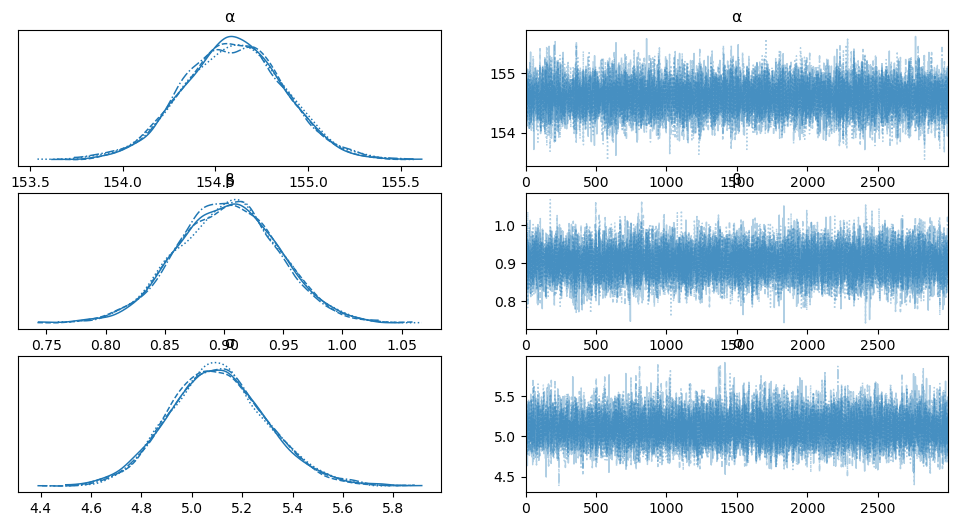

In [12]:
az.plot_trace(idata_m4_3, var_names=['α', 'β', 'σ']);

* Exercise __4M8__ is about splines. We have not talked about this in the lecture, and you can safely skip it if your only guidance is exam curriculum.  Otherwise it is a fascinating exercise, so feel free to look into  it.

* Exercise __4H2__ uses the Howell dataset again. It is loaded above into `data` and `adults`. You probably want to reuse the model formulation from above, too.  As usual, use the pPyMC sampler, not quadratic approximation.

* Exercise __4H3__ in part (b) refers to an R plot that might look mysterious to you.  Just use the same kind of plot as in __4H2__. This is what they mean :)

* The parabolic model Exercise __4H4__ talks about is the one found on p. 111

* Exercise __4H5__ is using the cherry Blosom data from p. 114. Below is the code to load it. Also the exercise is unclear which regression to use. Since we are trying to de-emphasize splines, try just with usual linear regression.

In [ ]:
d = pd.read_csv("cherry_blossoms.csv").to_xarray()
# if you want to drop NAs:
d = pd.read_csv("cherry_blossoms.csv").dropna().to_xarray()

# summary stats the rethinking way
print(rt.precis(d))

# summary stats the pandas way
pd.read_csv("cherry_blossoms.csv").dropna().describe()

In [ ]:
# summary stats the arviz way
az.summary(pd.read_csv("cherry_blossoms.csv").dropna().to_dict(orient="list"), kind="stats")

* Exercise __4H6__ is asking for cherry Blosom spline fitting, while we are trying to de-emphasize splines in the course a bit (the course is sufficiently large as it is already).  Instead try to generate prior predictive from a linear regression from 4H5 (just to train the concept). Use the prior predictive distribution to assess the choice of priors.

* Skip exercise __4H8__, as it is purely about splines.

# Mine

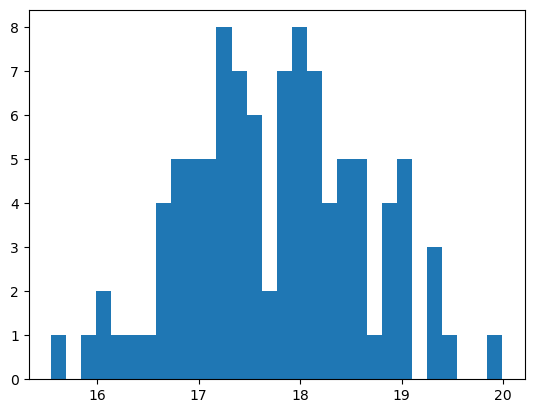

In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100
mu = np.random.normal(0, 10)
sigma = np.random.exponential(1)
y = np.random.normal(mu, sigma, n)

plt.hist(y, bins=30)
plt.show()

In [28]:
az.summary(y)

arviz - WARNING - Shape validation failed: input_shape: (1, 100), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,17.752,0.872,16.113,19.343,0.095,0.067,92.0,102.0,NaN
